# Color Spaces
A color space is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

## Types of Color Spaces

### RGB
RGB is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

Note: If you read in an image using matplotlib. <code>image.imread()</code> you will get an RGB image, but if you read it in using OpenCV <code>cv2.imread()</code> this will give you a BGR image.

<center><img src="LectureImages/screen-shot-2016-11-22-at-4.35.48-pm.png" width="300" height="300"></center>

### HLS & HSV
There is also HSV color space (hue, saturation, and value), and HLS space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis.

**Hue** : the value that represents color independent of any change in brightness   
**Lightness and Value** : represent different ways to measure the relative lightness or darkness of a color   
**Saturation** : measurement of colorfulness. as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value

<center><img src="LectureImages/screen-shot-2016-11-22-at-4.44.32-pm.png" width="700" height="700"></center>

## HLS Color Space

### Constants

$$ V_{max} \leftarrow max(R, G, B) $$
$$ V_{min} \leftarrow min(R, G, B) $$

### H channel conversion equations
There are three different equations, which one is used depends on the the value of $V_{max}$ whether that's R, G, B.

$$ H \leftarrow \frac{30(G - B)}{V_{max} - V_{min}} \quad if \; V_{max} = R $$

$$ H \leftarrow 60 + \frac{30(B - R)}{V_{max} - V_{min}} \quad if \; V_{max} = G $$

$$ H \leftarrow 120 +  \frac{30(R - G)}{V_{max} - V_{min}} \quad if \; V_{max} = B $$

Note: In OpenCV, for 8-bit images, **the range of H is from 0-179**. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.

### L channel conversion equations

$$ L \leftarrow \frac{V_{max} + V_{min}}{2} $$

### S channel conversion equations
There are two possible equations; one is used depending on the value of L.

$$ S \leftarrow \frac{V_{max} - V_{min}}{V_{max} + V_{min}} \quad if\; L<0.5$$

$$ S \leftarrow \frac{V_{max} - V_{min}}{2 - (V_{max} + V_{min})} \quad if\; L\ge0.5$$

## HLS and Color Thresholds

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

### Gray Scale

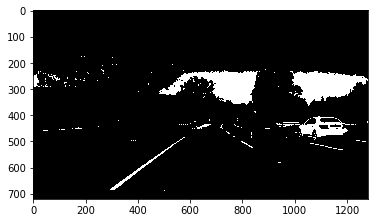

In [3]:
# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('LectureImages/test6.jpg') 
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

plt.imshow(binary, cmap='gray')

### RGB images

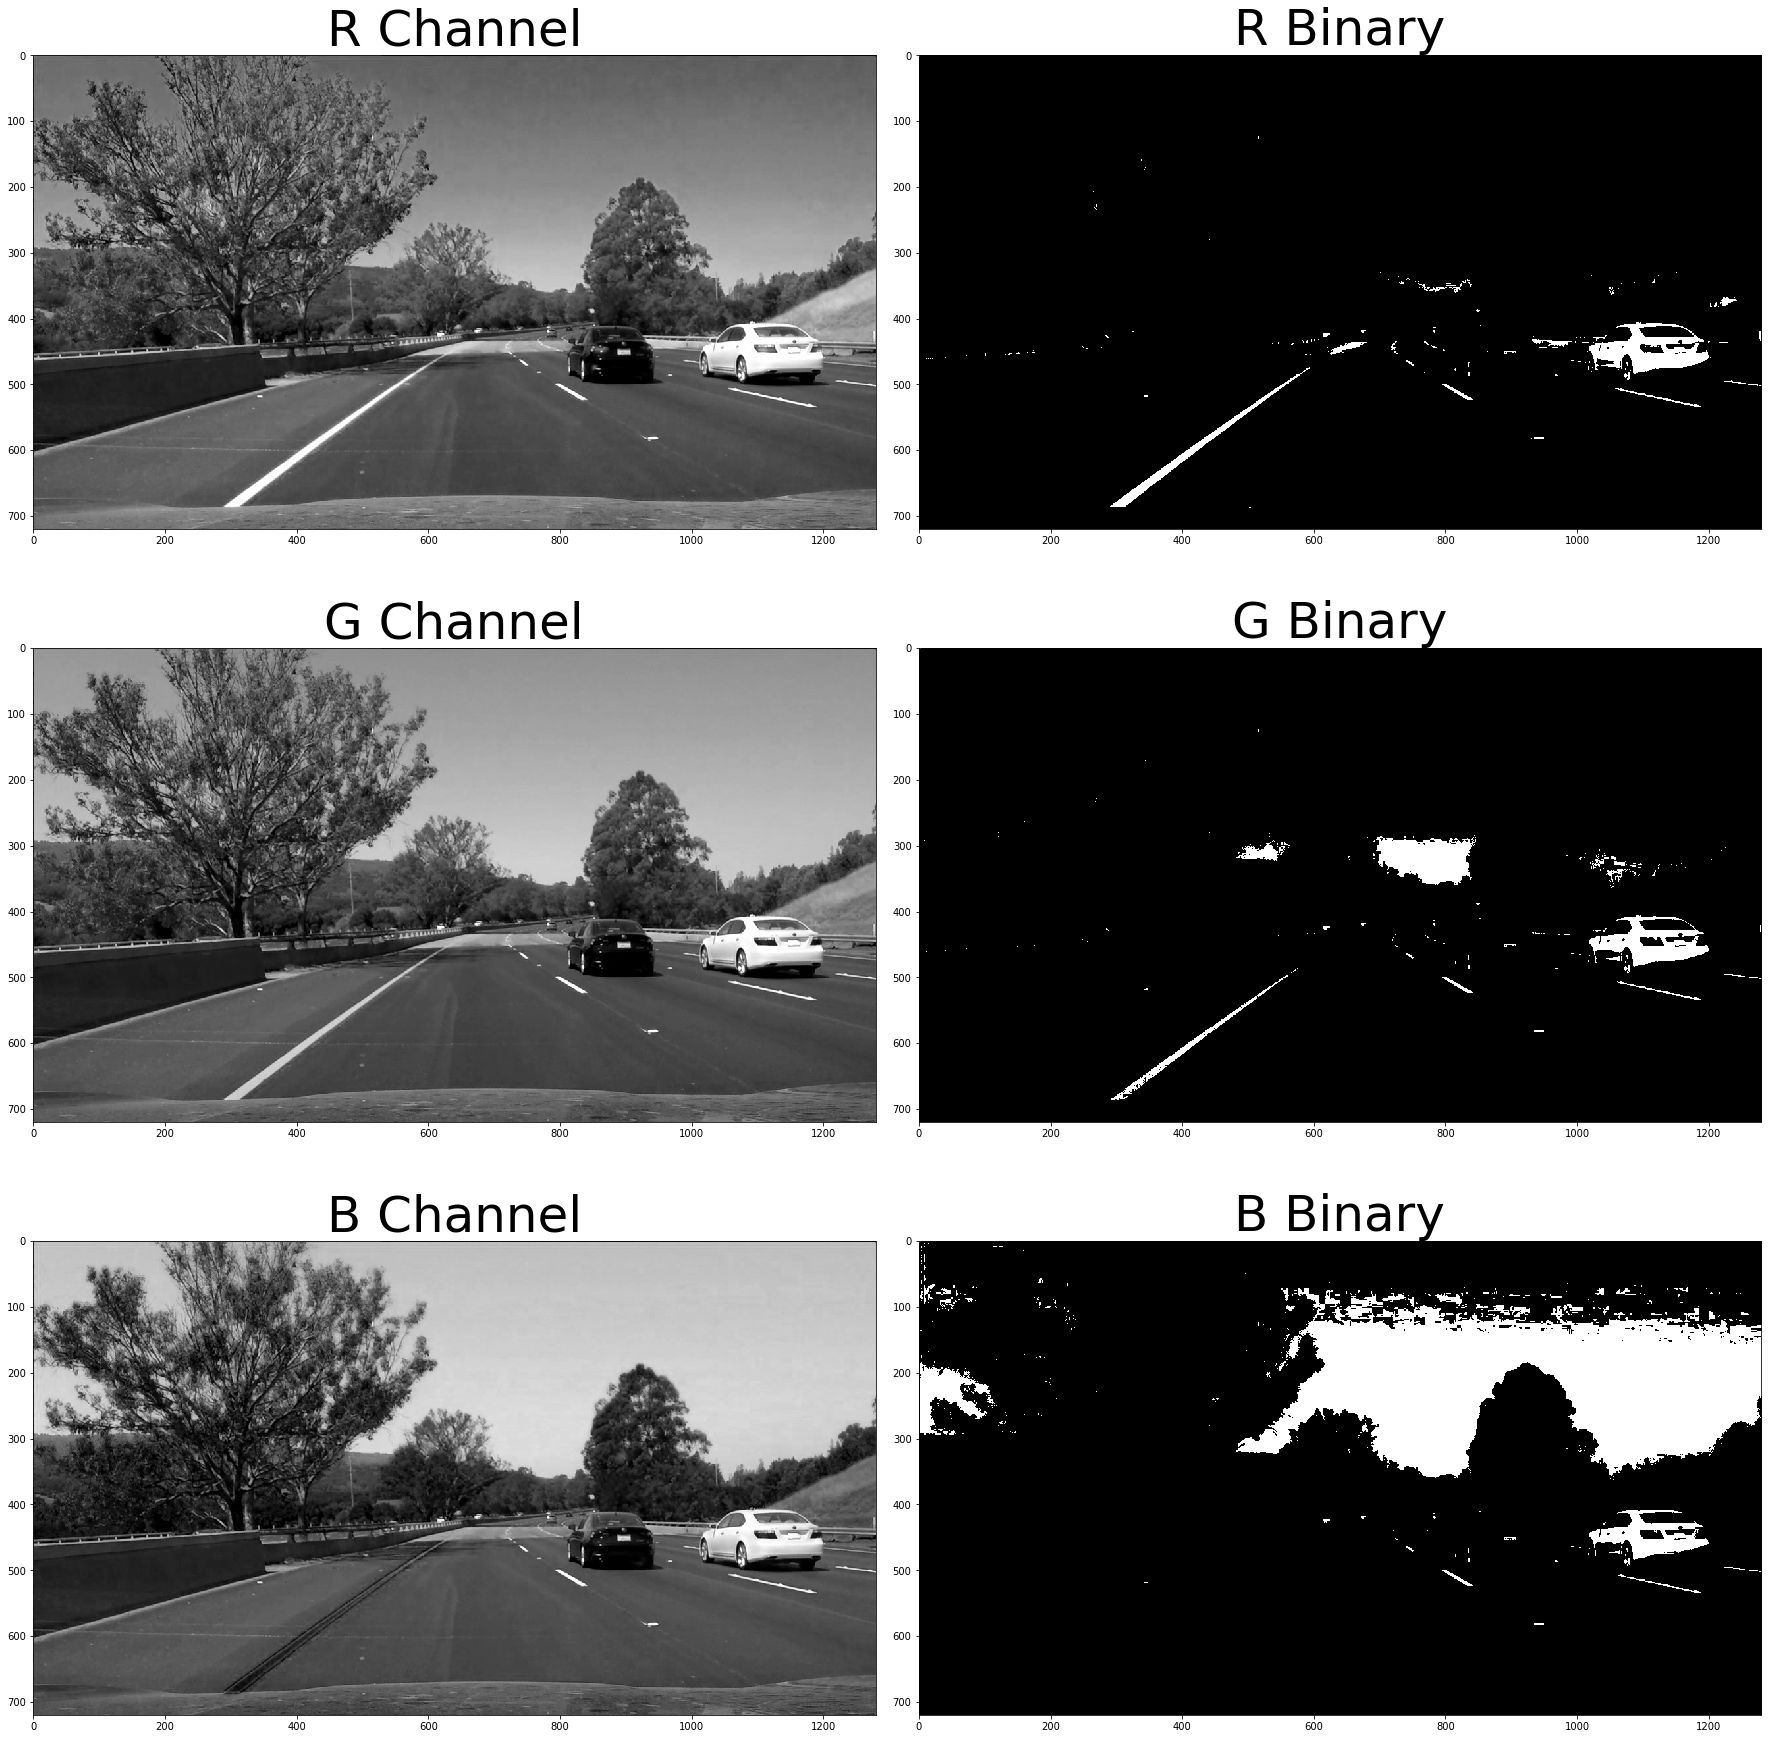

In [4]:
image = mpimg.imread('LectureImages/test6.jpg') 
thresh = (200, 255)

img_R = image[:, :, 0]
img_G = image[:, :, 1]
img_B = image[:, :, 2]

binary_R = np.zeros_like(img_R)
binary_G = np.zeros_like(img_G)
binary_B = np.zeros_like(img_B)

binary_R[(img_R > thresh[0]) & (img_R <= thresh[1])] = 1
binary_G[(img_G > thresh[0]) & (img_G <= thresh[1])] = 1
binary_B[(img_B > thresh[0]) & (img_B <= thresh[1])] = 1

f, ax = plt.subplots(3, 2, figsize = (24, 27))
f.tight_layout()
ax[0, 0].imshow(img_R, cmap='gray')
ax[0, 0].set_title('R Channel', fontsize=50)
ax[0, 1].imshow(binary_R, cmap='gray')
ax[0, 1].set_title('R Binary', fontsize=50)
ax[1, 0].imshow(img_G, cmap='gray')
ax[1, 0].set_title('G Channel', fontsize=50)
ax[1, 1].imshow(binary_G, cmap='gray')
ax[1, 1].set_title('G Binary', fontsize=50)
ax[2, 0].imshow(img_B, cmap='gray')
ax[2, 0].set_title('B Channel', fontsize=50)
ax[2, 1].imshow(binary_B, cmap='gray')
ax[2, 1].set_title('B Binary', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### HLS Images

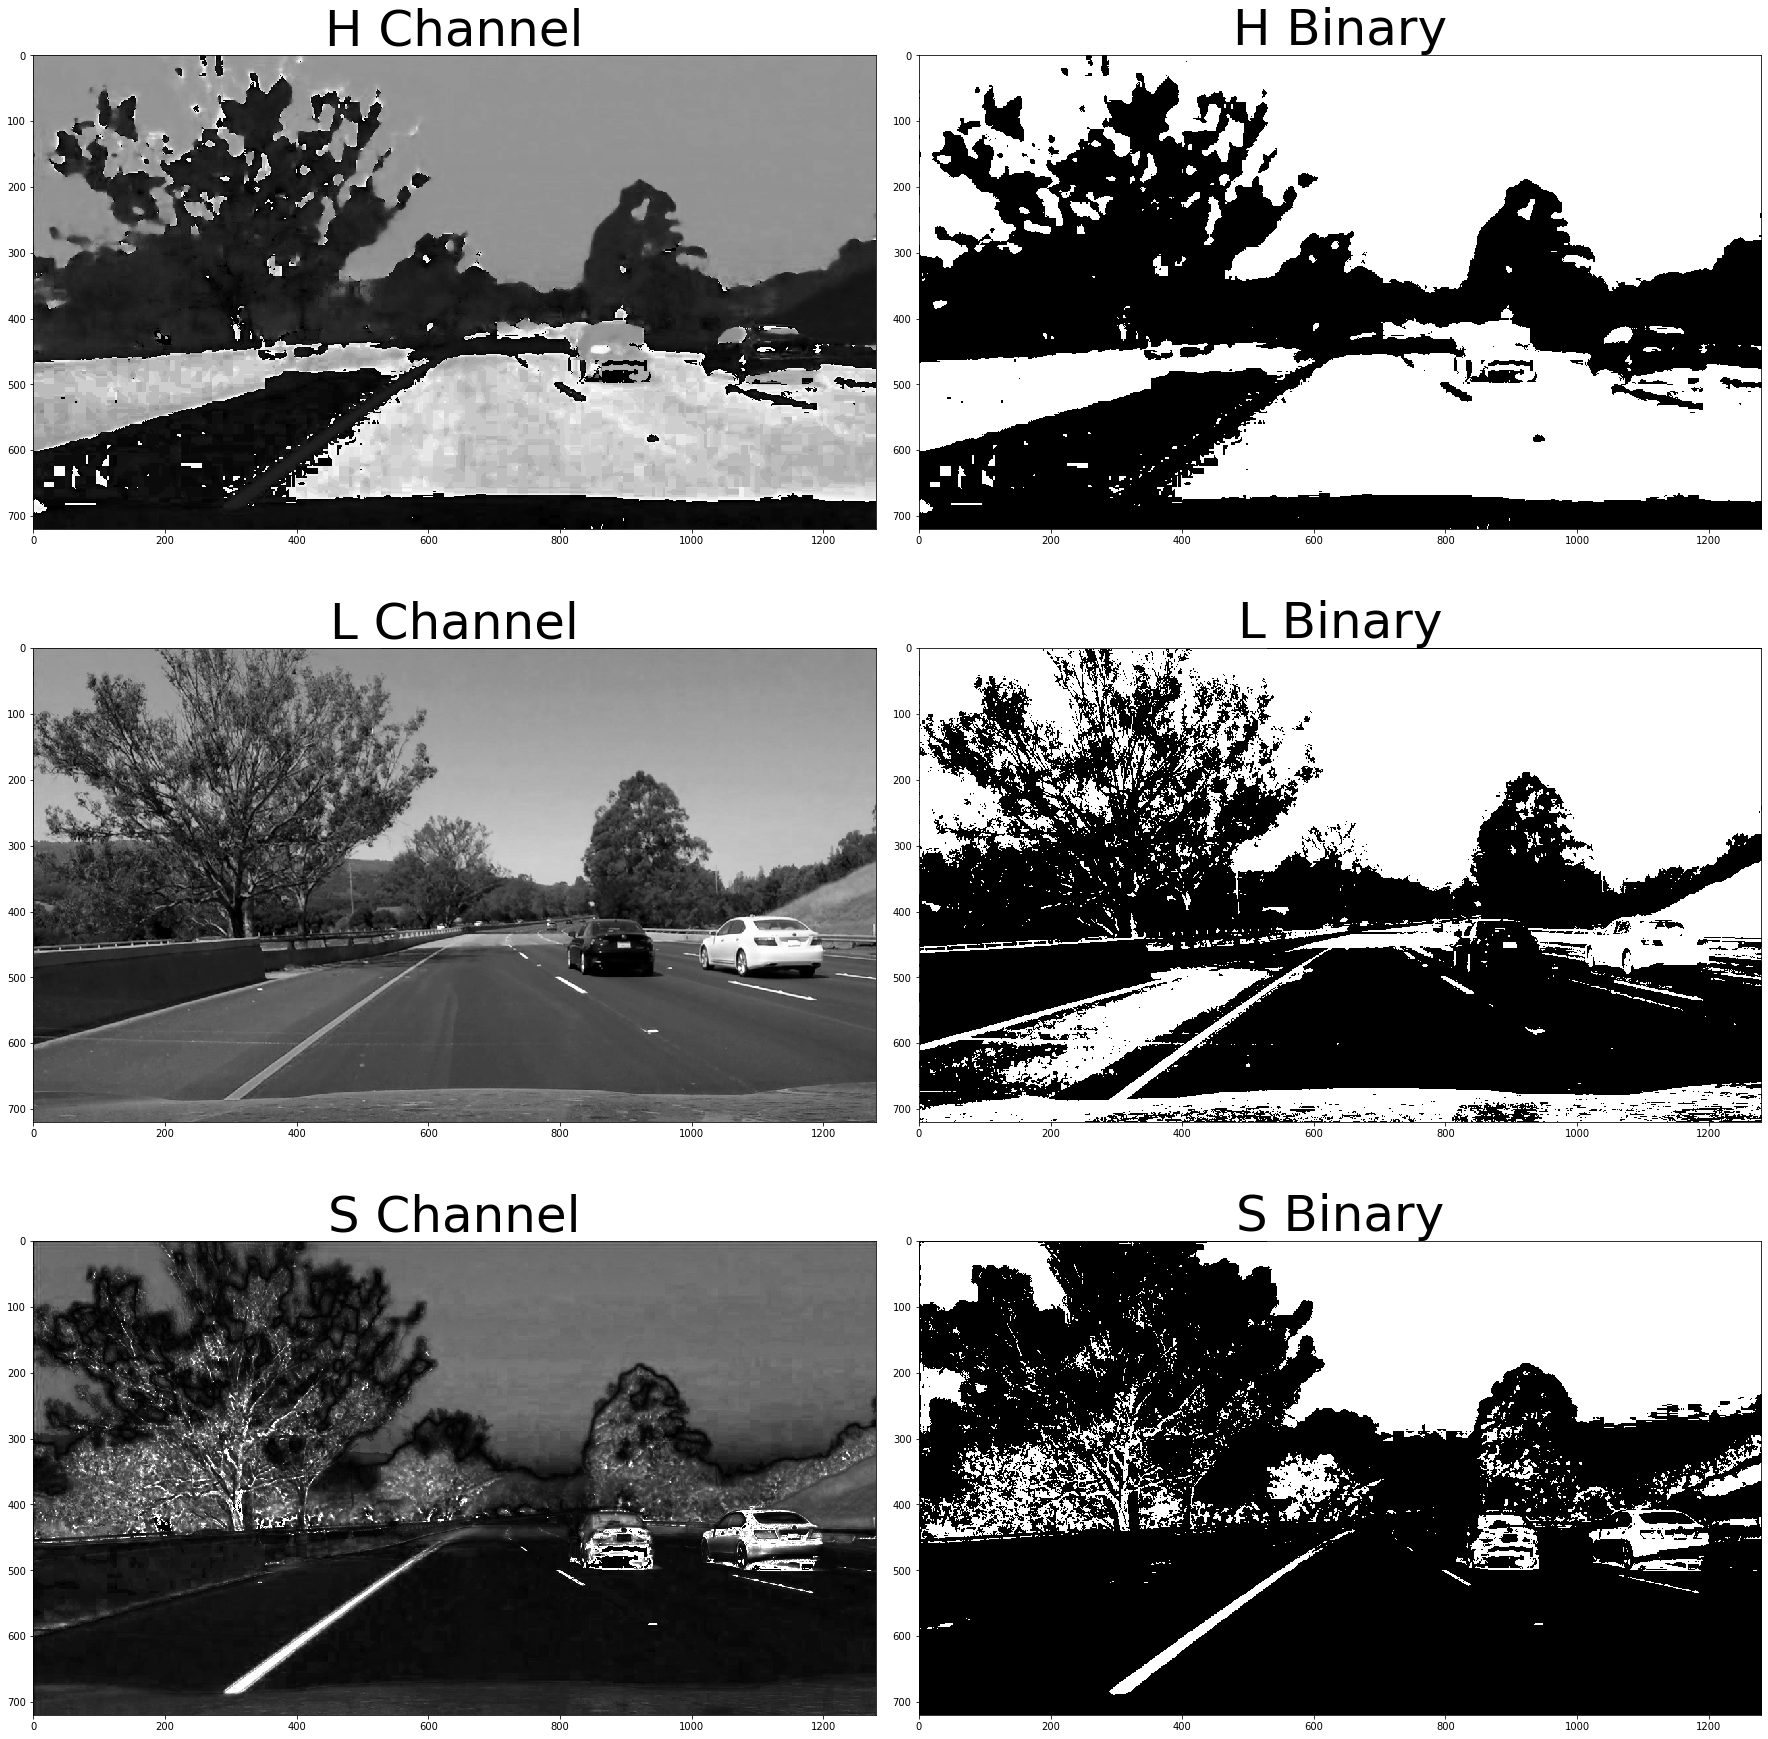

In [5]:
img_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
thresh = (90, 255)

img_H = img_HLS[:, :, 0]
img_L = img_HLS[:, :, 1]
img_S = img_HLS[:, :, 2]

binary_H = np.zeros_like(img_H)
binary_L = np.zeros_like(img_L)
binary_S = np.zeros_like(img_S)

binary_H[(img_H > thresh[0]) & (img_H <= thresh[1])] = 1
binary_L[(img_L > thresh[0]) & (img_L <= thresh[1])] = 1
binary_S[(img_S > thresh[0]) & (img_S <= thresh[1])] = 1

f, ax = plt.subplots(3, 2, figsize = (24, 27))
f.tight_layout()
ax[0,0].imshow(img_H, cmap='gray')
ax[0,0].set_title('H Channel', fontsize=50)
ax[0,1].imshow(binary_H, cmap='gray')
ax[0,1].set_title('H Binary', fontsize=50)
ax[1,0].imshow(img_L, cmap='gray')
ax[1,0].set_title('L Channel', fontsize=50)
ax[1,1].imshow(binary_L, cmap='gray')
ax[1,1].set_title('L Binary', fontsize=50)
ax[2,0].imshow(img_S, cmap='gray')
ax[2,0].set_title('S Channel', fontsize=50)
ax[2,1].imshow(binary_S, cmap='gray')
ax[2,1].set_title('S Binary', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

From these examples, you can see that the S channel is probably your best bet. It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. But it's not clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image:
<center><img src="LectureImages/test4.jpg" width="700" height="700"></center>


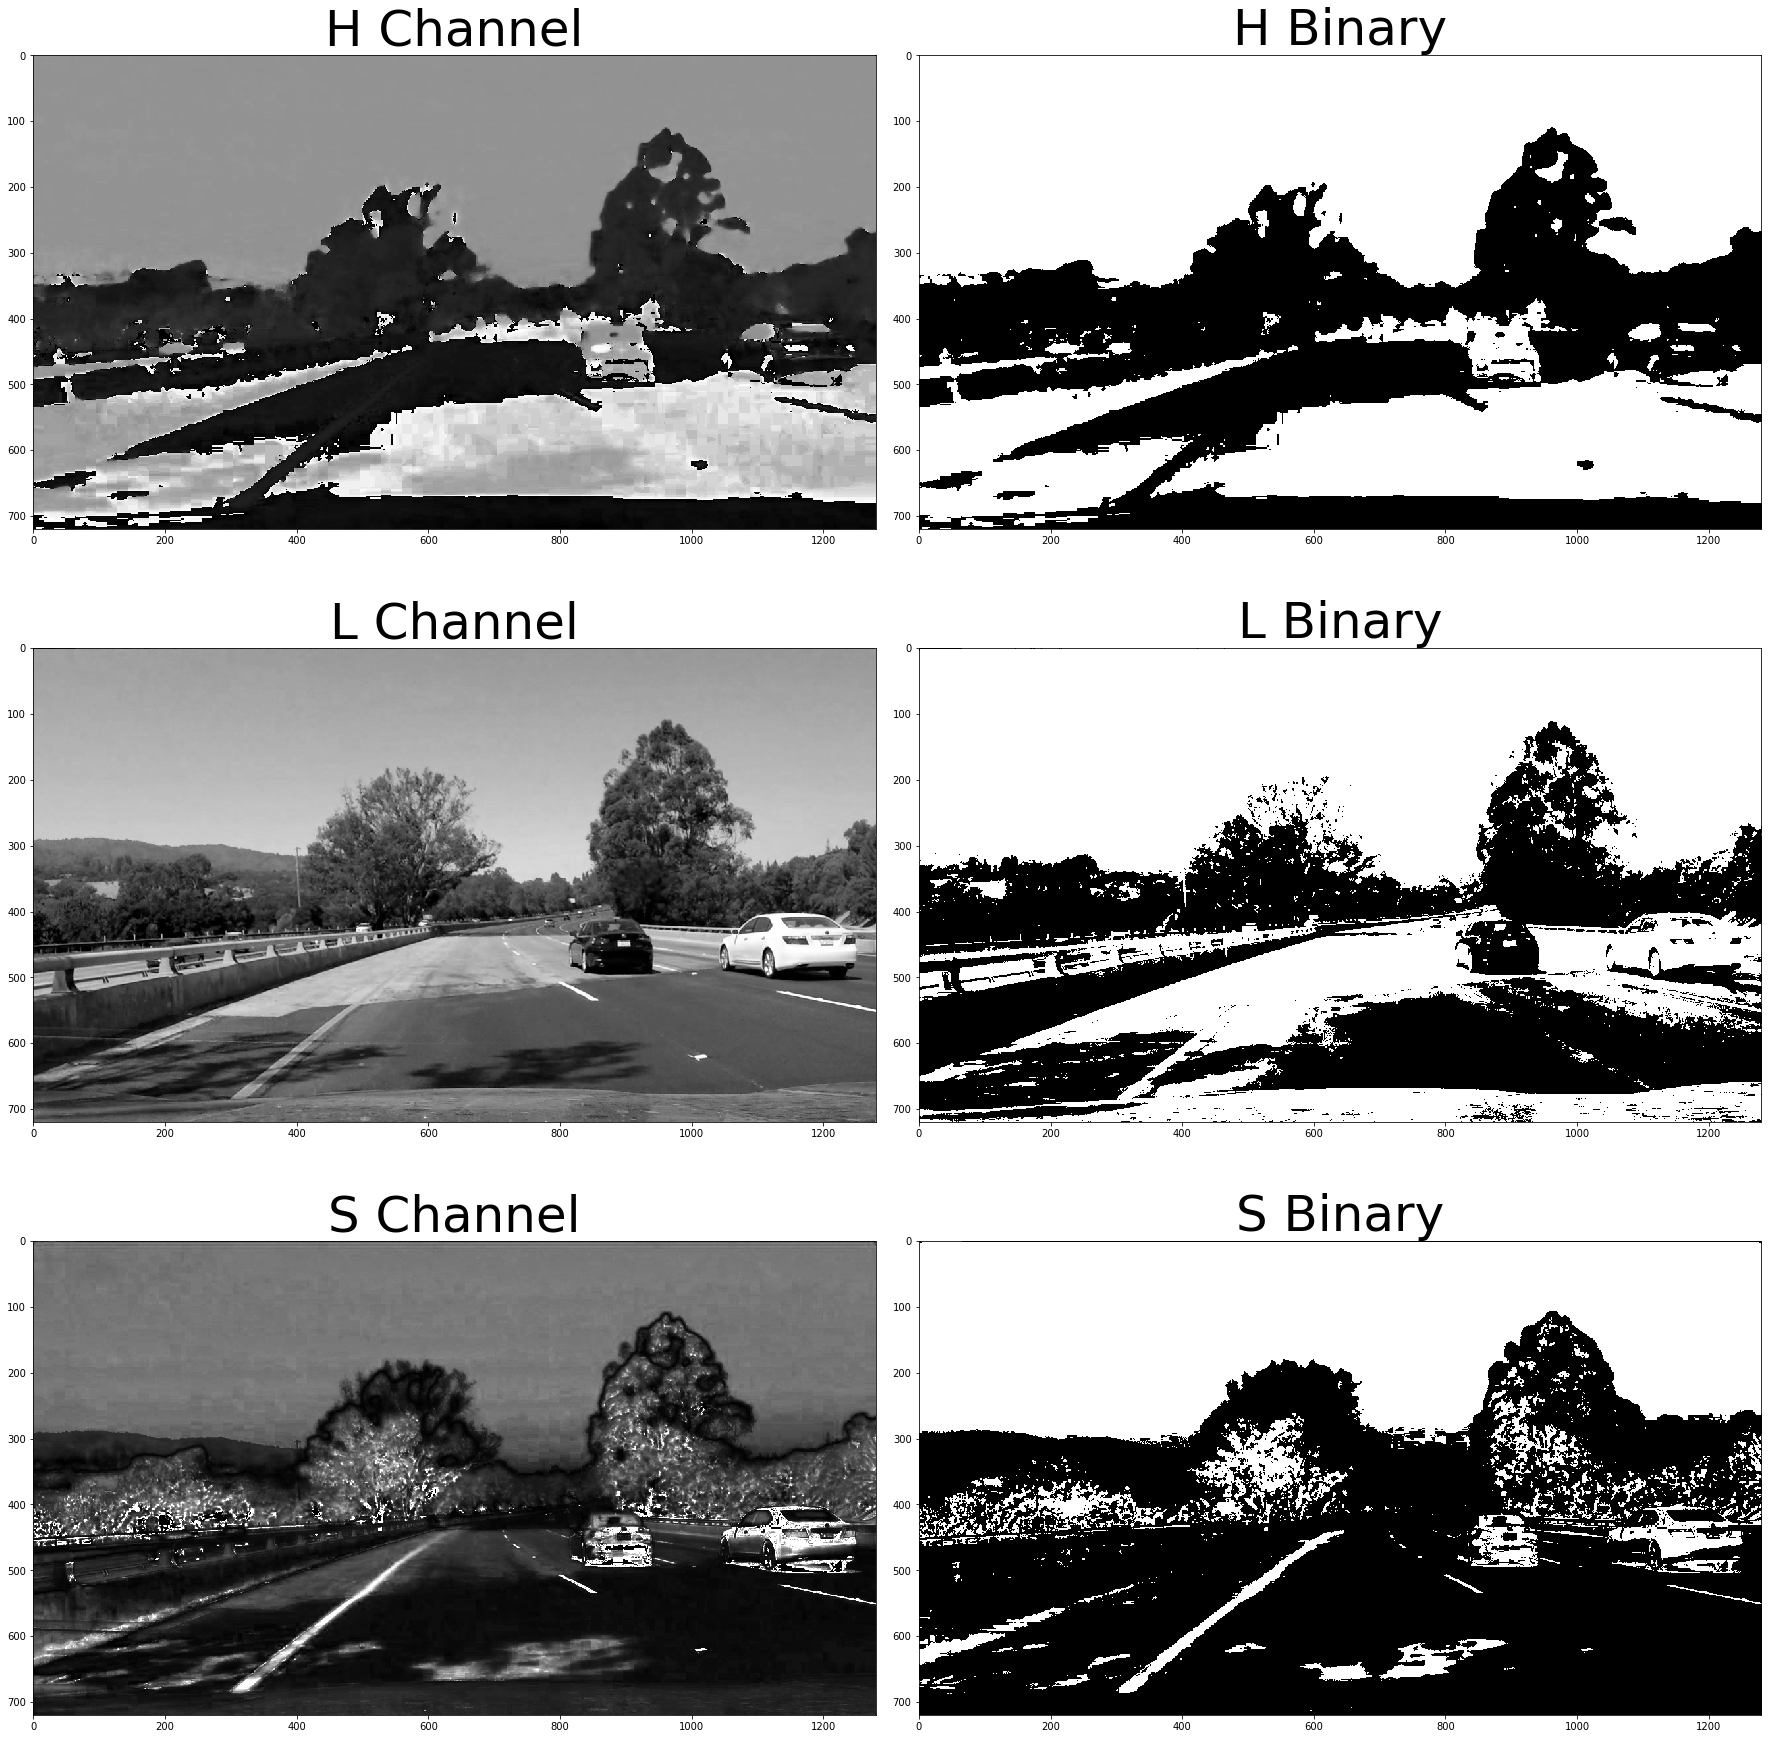

In [6]:
image = plt.imread('LectureImages/test4.jpg')

img_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

thresh = (90, 255)

img_H = img_HLS[:, :, 0]
img_L = img_HLS[:, :, 1]
img_S = img_HLS[:, :, 2]

binary_H = np.zeros_like(img_H)
binary_L = np.zeros_like(img_L)
binary_S = np.zeros_like(img_S)

binary_H[(img_H > thresh[0]) & (img_H <= thresh[1])] = 1
binary_L[(img_L > thresh[0]) & (img_L <= thresh[1])] = 1
binary_S[(img_S > thresh[0]) & (img_S <= thresh[1])] = 1

f, ax = plt.subplots(3, 2, figsize = (24, 27))
f.tight_layout()
ax[0,0].imshow(img_H, cmap='gray')
ax[0,0].set_title('H Channel', fontsize=50)
ax[0,1].imshow(binary_H, cmap='gray')
ax[0,1].set_title('H Binary', fontsize=50)
ax[1,0].imshow(img_L, cmap='gray')
ax[1,0].set_title('L Channel', fontsize=50)
ax[1,1].imshow(binary_L, cmap='gray')
ax[1,1].set_title('L Binary', fontsize=50)
ax[2,0].imshow(img_S, cmap='gray')
ax[2,0].set_title('S Channel', fontsize=50)
ax[2,1].imshow(binary_S, cmap='gray')
ax[2,1].set_title('S Binary', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

## Color and Gradient
Now it's time to combine what you know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:
<center><img src = 'LectureImages/screen-shot-2016-12-06-at-5.19.16-pm.png' width="900" height="900"></center>
At this point, it's okay to detect edges around trees or cars because these lines can be mostly filtered out by applying a mask to the image and essentially cropping out the area outside of the lane lines. It's most important that you reliably detect different colors of lane lines under varying degrees of daylight and shadow.

You can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. You can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

Here's what that looks like in code:

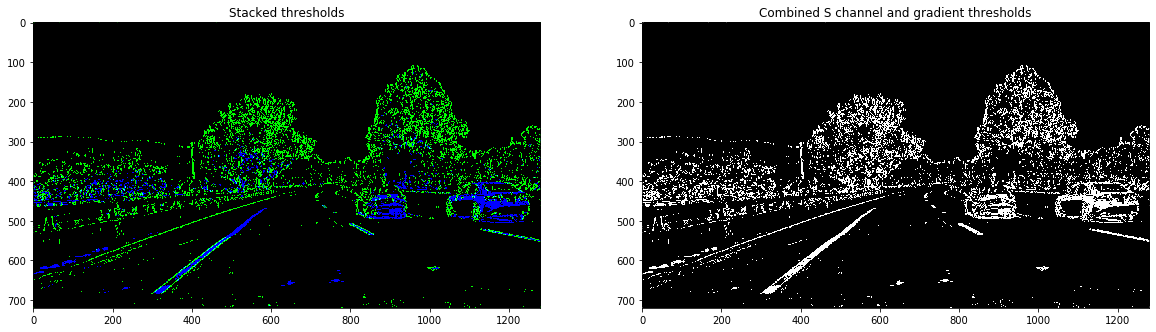

In [7]:
img = plt.imread('LectureImages/test4.jpg')

# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')